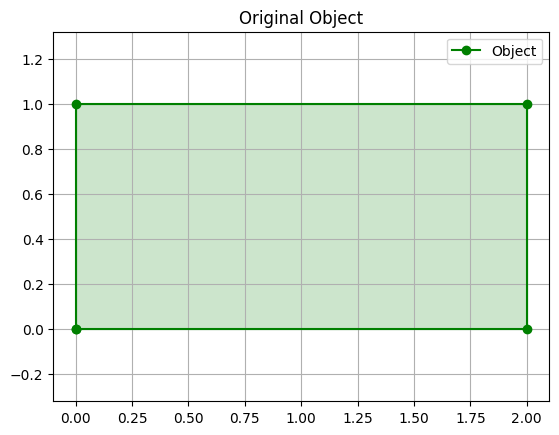

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_object(vertices, title, color='green'):
    plt.figure()
    vertices = np.array(vertices)
    plt.plot(*vertices.T, marker='o', color=color, label='Object')
    plt.fill(*vertices.T, alpha=0.2, color=color)
    plt.title(title)
    plt.axis('equal')
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_transformed_object(vertices_original, vertices_transformed, title, color_original='green', color_transformed='red'):
    plt.figure()
    vertices_original = np.array(vertices_original)
    vertices_transformed = np.array(vertices_transformed)

    plt.plot(*vertices_original.T, marker='o', color=color_original, label='Original')
    plt.fill(*vertices_original.T, alpha=0.2, color=color_original)

    plt.plot(*vertices_transformed.T, marker='o', color=color_transformed, label='Transformed')
    plt.fill(*vertices_transformed.T, alpha=0.2, color=color_transformed)

    plt.title(title)
    plt.axis('equal')
    plt.grid(True)
    plt.legend()
    plt.show()

def apply_transformation(vertices, transformation_matrix):
    ones = np.ones((vertices.shape[0], 1))
    vertices_homogeneous = np.hstack([vertices, ones])
    transformed = transformation_matrix @ vertices_homogeneous.T
    return transformed[:2].T

rectangle = np.array([
    [0, 0],
    [2, 0],
    [2, 1],
    [0, 1]
])

def show_original(rectangle):
    plot_object(np.vstack([rectangle, rectangle[0]]), "Original Object", color='green')

show_original(rectangle)

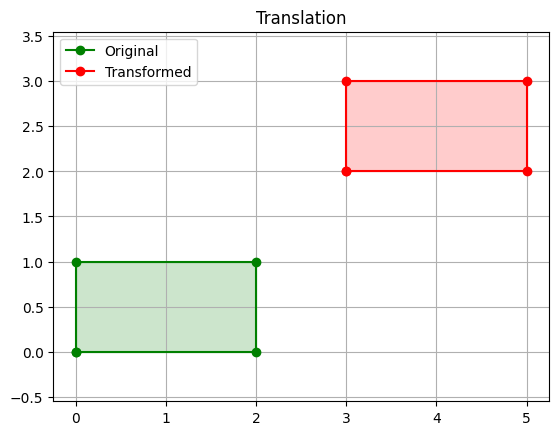

In [ ]:
def translation(rectangle, Tx, Ty):
    translation_matrix = np.array([
        [1, 0, Tx],
        [0, 1, Ty],
        [0, 0, 1]
    ])
    translated = apply_transformation(rectangle, translation_matrix)
    plot_transformed_object(np.vstack([rectangle, rectangle[0]]), np.vstack([translated, translated[0]]), "Translation", color_transformed='red')

translation(rectangle, 3, 2)


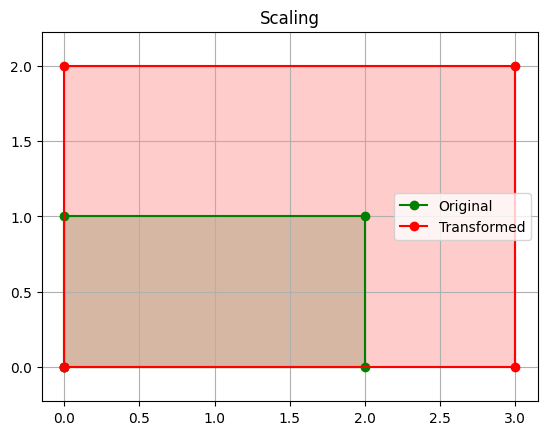

In [ ]:
def scaling(rectangle, Sx, Sy):
    scaling_matrix = np.array([
        [Sx, 0, 0],
        [0, Sy, 0],
        [0, 0, 1]
    ])
    scaled = apply_transformation(rectangle, scaling_matrix)
    plot_transformed_object(np.vstack([rectangle, rectangle[0]]), np.vstack([scaled, scaled[0]]), "Scaling", color_transformed='red')

scaling(rectangle, 1.5, 2)


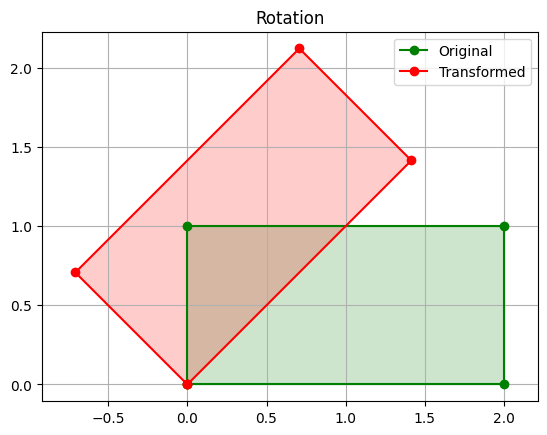

In [ ]:
def rotation(rectangle, theta):
    rad = np.radians(theta)
    rotation_matrix = np.array([
        [np.cos(rad), -np.sin(rad), 0],
        [np.sin(rad), np.cos(rad), 0],
        [0, 0, 1]
    ])
    rotated = apply_transformation(rectangle, rotation_matrix)
    plot_transformed_object(np.vstack([rectangle, rectangle[0]]), np.vstack([rotated, rotated[0]]), "Rotation", color_transformed='red')

rotation(rectangle, 45)


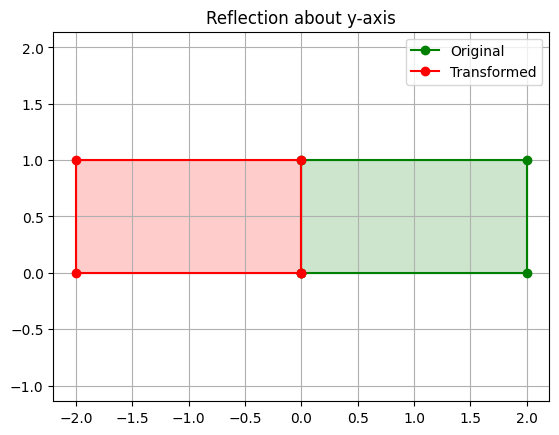

In [ ]:
def reflection(rectangle, axis='x'):
    if axis == 'x':
        reflection_matrix = np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    elif axis == 'y':
        reflection_matrix = np.array([
            [-1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ])
    else:
        raise ValueError("Invalid axis for reflection. Use 'x' or 'y'.")

    reflected = apply_transformation(rectangle, reflection_matrix)
    plot_transformed_object(np.vstack([rectangle, rectangle[0]]), np.vstack([reflected, reflected[0]]), f"Reflection about {axis}-axis", color_transformed='red')

reflection(rectangle, axis='y')


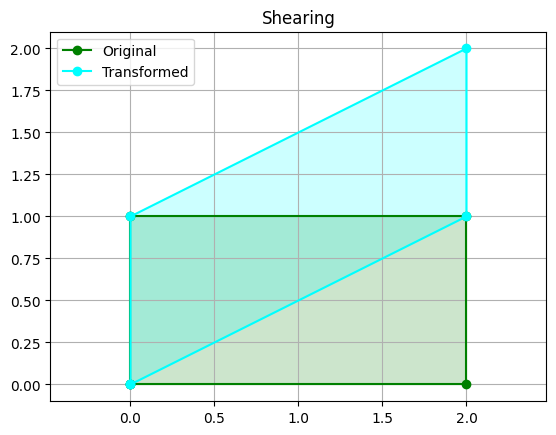

In [ ]:
def shearing(rectangle, Shx, Shy):
    shearing_matrix = np.array([
        [1, Shx, 0],
        [Shy, 1, 0],
        [0, 0, 1]
    ])
    sheared = apply_transformation(rectangle, shearing_matrix)
    plot_transformed_object(np.vstack([rectangle, rectangle[0]]), np.vstack([sheared, sheared[0]]), "Shearing", color_transformed='cyan')

# Example usage:
shearing(rectangle, Shx=0, Shy=0.5)


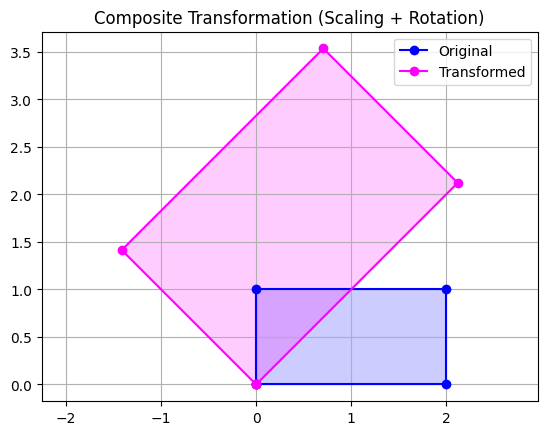

In [ ]:
def composite_transformation(rectangle, scaling_factors, rotation_angle):
    Sx, Sy = scaling_factors
    scaling_matrix = np.array([
        [Sx, 0, 0],
        [0, Sy, 0],
        [0, 0, 1]
    ])

    rad = np.radians(rotation_angle)
    rotation_matrix = np.array([
        [np.cos(rad), -np.sin(rad), 0],
        [np.sin(rad), np.cos(rad), 0],
        [0, 0, 1]
    ])

    # Composite: Scaling followed by Rotation
    composite_matrix = rotation_matrix @ scaling_matrix
    composite_transformed = apply_transformation(rectangle, composite_matrix)
    plot_transformed_object(np.vstack([rectangle, rectangle[0]]), np.vstack([composite_transformed, composite_transformed[0]]), "Composite Transformation (Scaling + Rotation)", color_transformed='magenta')

# Example usage:
composite_transformation(rectangle, scaling_factors=(1.5, 2), rotation_angle=45)


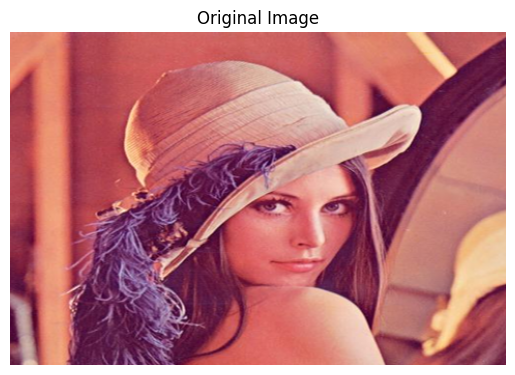

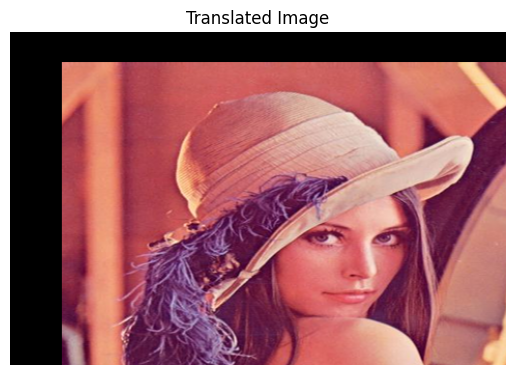

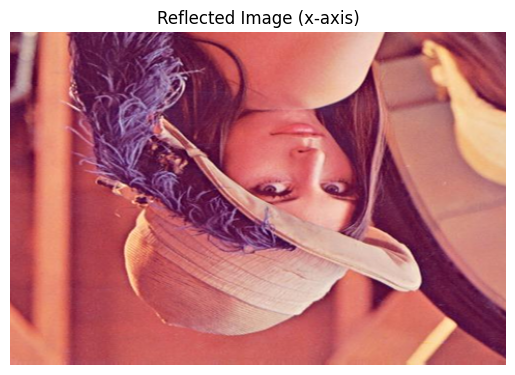

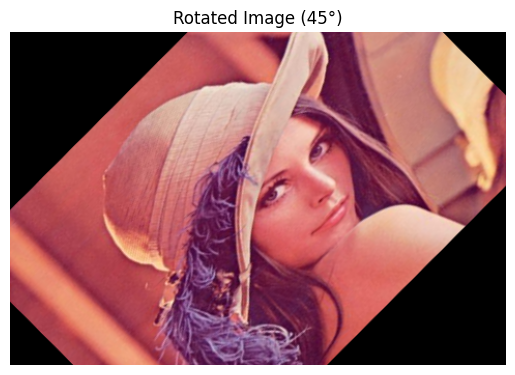

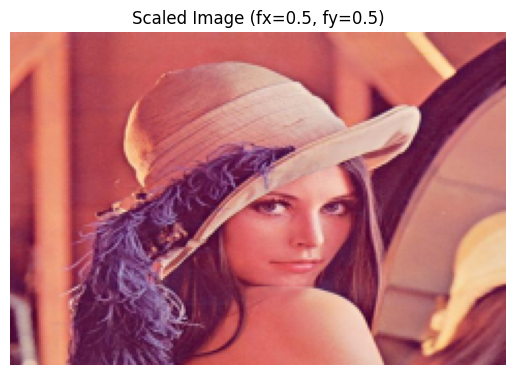

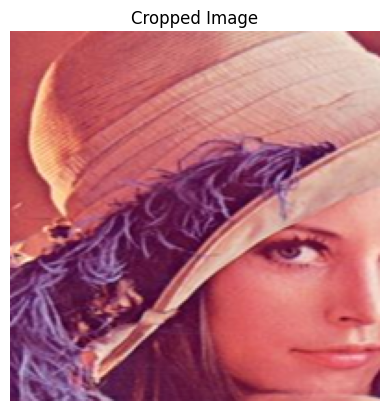

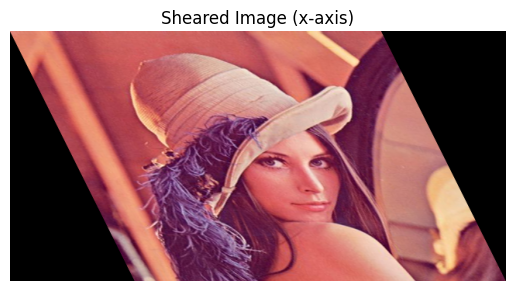

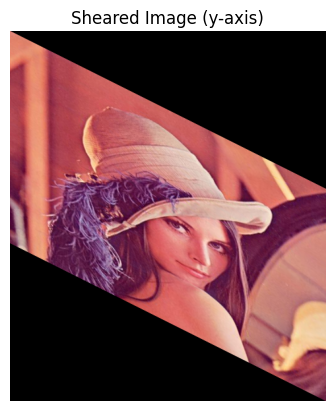

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/Screenshot 2025-01-18 225913.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def show_image(img, title):
    plt.figure()
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Image Translation
def translate_image(img, tx, ty):
    rows, cols = img.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_img = cv2.warpAffine(img, translation_matrix, (cols, rows))
    show_image(translated_img, "Translated Image")

# 2. Reflection
def reflect_image(img, axis='x'):
    if axis == 'x':
        reflected_img = cv2.flip(img, 0)  # Flip vertically
    elif axis == 'y':
        reflected_img = cv2.flip(img, 1)  # Flip horizontally
    else:
        raise ValueError("Axis must be 'x' or 'y'")
    show_image(reflected_img, f"Reflected Image ({axis}-axis)")

# 3. Rotation
def rotate_image(img, angle):
    rows, cols = img.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))
    show_image(rotated_img, f"Rotated Image ({angle}°)")

# 4. Scaling
def scale_image(img, fx, fy):
    scaled_img = cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    show_image(scaled_img, f"Scaled Image (fx={fx}, fy={fy})")

# 5. Cropping
def crop_image(img, x_start, y_start, width, height):
    cropped_img = img[y_start:y_start+height, x_start:x_start+width]
    show_image(cropped_img, "Cropped Image")

# 6. Shearing in x-axis
def shear_image_x(img, shear_factor):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_img = cv2.warpAffine(img, shear_matrix, (cols + int(shear_factor * rows), rows))
    show_image(sheared_img, "Sheared Image (x-axis)")

# 7. Shearing in y-axis
def shear_image_y(img, shear_factor):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_img = cv2.warpAffine(img, shear_matrix, (cols, rows + int(shear_factor * cols)))
    show_image(sheared_img, "Sheared Image (y-axis)")

# Display original image
show_image(image, "Original Image")

# Perform Transformations
translate_image(image, tx=50, ty=30)
reflect_image(image, axis='x')
rotate_image(image, angle=45)
scale_image(image, fx=0.5, fy=0.5)
crop_image(image, x_start=100, y_start=50, width=200, height=200)
shear_image_x(image, shear_factor=0.5)
shear_image_y(image, shear_factor=0.5)
